<a href="https://colab.research.google.com/github/francomanca93/fundamentos-de-estadistica-con-python/blob/analisis-exploratorio/2.%20Caracterizar%20informaci%C3%B3n%20a%20traves%20del%20an%C3%A1lisis%20exploratorio/4_Diagrama_de_frecuencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diagramas de frecuencias para variables continuas y discretas

En estadistica descriptiva tenemos los diagramas de frecuencia o [histogramas](https://es.wikipedia.org/wiki/Histograma), estos es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados.

Sirven para obtener una "primera vista" general, o panorama, de la distribución de la población, o de la muestra, respecto a una característica, cuantitativa y continua. 

En resuemn son una representación categórica y numérica de la distribución de los datos. 

Las variables que podemos representar son:
* **Variables categóricas**: Tablas de frecuencia
* **Variables numéricas**: percentiles, deciles, quintiles y quartiles, outliers o valores extremos.


Importamos librerias que vamos a utilizar

In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats

Montamos drive para acceder a la base de datos con la cual vamos a trabajar

In [3]:
#Montamos Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
ls '/content/drive/My Drive/Colab Notebooks/fundamentos-de-estadistica-con-python/datos/'

bicicletas-compartidas.csv  datos_profesora.py  __pycache__/


In [5]:
cd '/content/drive/My Drive/Colab Notebooks/fundamentos-de-estadistica-con-python/datos/'

/content/drive/My Drive/Colab Notebooks/fundamentos-de-estadistica-con-python/datos


In [6]:
df = pd.read_csv('bicicletas-compartidas.csv')
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

## Variables categoricas

Vamos a medir la frencuencia para variables categoricas.

Vamos a tomar como ejemplo la columna cuartil-ano, es una columna que parece indicar en que parte del año se ha producido algo, diferenciado en cuartiles del mismo.

In [7]:
ycat = df['cuartil-ano']
ycat

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
17409    3.0
17410    3.0
17411    3.0
17412    3.0
17413    3.0
Name: cuartil-ano, Length: 17414, dtype: float64

Como la variable tiene valores numericos, vamos a transformarla y a darle un nombre diferente para indicar que es una variable categorica.

In [8]:
ycat = ycat.apply(lambda x: 'Cat-' + str(int(x)))
ycat

0        Cat-3
1        Cat-3
2        Cat-3
3        Cat-3
4        Cat-3
         ...  
17409    Cat-3
17410    Cat-3
17411    Cat-3
17412    Cat-3
17413    Cat-3
Name: cuartil-ano, Length: 17414, dtype: object

Veamos ahora cuantos valores puede tomar esta variable, ya que son muchos datos y a simple viste no lo podemos saber, tambien la cantidad de los mismo.

In [10]:
valores, conteo_freq = np.unique(ycat, return_counts=True)
valores, conteo_freq

(array(['Cat-0', 'Cat-1', 'Cat-2', 'Cat-3'], dtype=object),
 array([4394, 4387, 4303, 4330]))

Si quisieramos declarar una tabla con estos valores que hemos encontrado, lo podemos hacer de la siguiente manera:

In [11]:
tabla_frecuencia = dict(zip(valores, conteo_freq))
tabla_frecuencia

{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

## Cuantiles

Los [cuantiles](https://es.wikipedia.org/wiki/Cuantil) son puntos tomados a intervalos regulares de la función de distribución de una variable aleatoria.

Los cuantiles suelen usarse por grupos que dividen la distribución en partes iguales; entendidas estas como intervalos que comprenden la misma proporción de valores. Los más usados son:

* Los **cuartiles**, que dividen a la distribución en cuatro partes (corresponden a los cuantiles 0,25; 0,50 y 0,75);
* Los **quintiles**, que dividen a la distribución en cinco partes (corresponden a los cuantiles 0,20; 0,40; 0,60 y 0,80);
* Los **deciles**, que dividen a la distribución en diez partes;
* Los **percentiles**, que dividen a la distribución en cien partes.

![cuantiles](https://upload.wikimedia.org/wikipedia/commons/5/5e/Iqr_with_quantile.png)

Los cuartiles 0,25; 0,50 y 0,75 de la distribución normal -más conocidos como los cuartiles Q_1, Q_2 y Q_3-, dividen la distribución en cuatro bloques, cada uno de los cuales contiene el 25% de los datos.

Veamos ahora como se comporta una variable numerica como habiamos visto antes. 

Haremos una copia de la variable **viento** y luego obtendremos valores descriptivos de esta variable para analizarla.

In [12]:
ynum = df['viento'].copy()

Maximo y minimo

In [13]:
np.min(ynum), np.max(ynum)

(0.0, 56.5)

### Percentiles

Percentil 100, que corresponde al 100% de los datos

In [14]:
np.percentile(ynum, q=100)

56.5

Percentil 0, que corresponde al 0% de los datos

In [15]:
np.percentile(ynum, q=0)

0.0

Percentil 50, que corresponde al 50% de los datos

In [16]:
np.percentile(ynum, q=50)

15.0

El percentil 50 y la mediana son los mismo. 

In [17]:
np.median(ynum)

15.0

### Cuartiles

Minimo, 25%, 50%, 75% y Maximo.

In [18]:
cuartiles = [0, 25, 50, 75, 100]
np.percentile(ynum, q = cuartiles)

array([ 0. , 10. , 15. , 20.5, 56.5])

### Quintiles

Minimo, 20%, 40%, 60%, 80% y Maximo.

In [19]:
quintiles = [0, 20, 40, 60, 80, 100]
np.percentile(ynum, q = quintiles)

array([ 0. ,  9. , 13. , 17. , 22. , 56.5])

### Deciles
Es un rango de frecuencias que van desde 0 a 100% de 10 en 10. 

In [21]:
deciles = list(range(0, 110, 10))
np.percentile(ynum, q = deciles)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

### Outliers (Valores atípicos) 

Los valores outliers son aquellos fuera de un rango y que estan asociados a los cuartiles. Hay que tenerlos en cuenta ya que habria que hacer un estudio diferente con estos. 

[Metodo de detección del Outlier](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097)

In [22]:
y = df['bicis-compartidas']
y.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [23]:
Q1 = np.percentile(ynum, q = 25)
Q3 = np.percentile(ynum, q = 75)

IQR = Q3 - Q1 # Inter-Quartile Range

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

[lim_inf, lim_sup]

[-5.75, 36.25]

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([1100., 4559., 4198., 4285., 1985.,  868.,  300.,   86.,   27.,
           6.]),
 array([ 0.  ,  5.65, 11.3 , 16.95, 22.6 , 28.25, 33.9 , 39.55, 45.2 ,
        50.85, 56.5 ]),
 <a list of 10 Patch objects>)

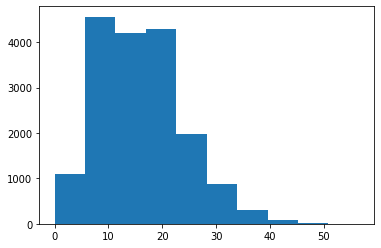

In [25]:
plt.hist(ynum)